In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as snf

In [2]:
url = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv"
data = pd.read_csv(url)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Division del conjunto de datos

In [10]:
n = np.random.randn(len(data))

(array([ 3.,  4., 15., 26., 30., 42., 43., 20., 12.,  5.]),
 array([-2.9150673 , -2.38172363, -1.84837996, -1.31503629, -0.78169262,
        -0.24834895,  0.28499472,  0.81833839,  1.35168206,  1.88502573,
         2.4183694 ]),
 <a list of 10 Patch objects>)

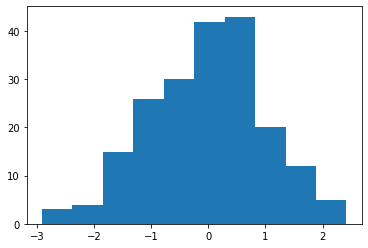

In [11]:
plt.hist(n)

In [13]:
check = (n<0.8)
train = data[check]
test = data[~check]

In [18]:
len(train), len(test)

(161, 39)

In [22]:
lm  = snf.ols(formula="Sales~TV+Radio", data=train).fit()

In [23]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     882.5
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           1.82e-86
Time:                        15:41:13   Log-Likelihood:                -292.92
No. Observations:                 161   AIC:                             591.8
Df Residuals:                     158   BIC:                             601.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9087      0.298      9.754      0.000       2.320       3.498
TV             0.0471      0.001     33.842      0.000       0.044       0.050
Radio          0.1830      0.008     22.177      0.000       0.167       0.199
==============================================================================
Omnibus:                       15.443   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.032
Skew:                          -0.780   Prob(JB):                     0.000200
Kurtosis:                       3.326   Cond. No.                         423.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sales = 2.9087 + 0.0471*TV+0.1830*Radio

### Validacion del modelo con el conjunto de testing

In [24]:
sales_pred = lm.predict(test)

In [25]:
SSD = sum((test["Sales"]-sales_pred)**2)
SSD

203.1253894675722

In [26]:
RSE = np.sqrt(SSD/len(test)-2-1)
RSE

1.4860495683796482

In [27]:
sales_mean = np.mean(test["Sales"])
error = RSE/sales_mean
error

0.11092044625226082